In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from toolz import curry, compose

from eden_rna.io.rfam import load
load_rfam = lambda rfam_id, num_seqs: load(rfam_id, seq_ids=range(num_seqs))


from eden_rna.rnaplfold import fold
plfold_params = dict(window_size = 250,
                      max_bp_span = 150,
                      hard_threshold=0.5,
                      avg_bp_prob_cutoff = 0.1,
                      max_num_edges = 2,
                      no_lonely_bps=True,
                      nesting=True)
fold_plfold = curry(fold)(**plfold_params)


from eden.display import draw_graph_set
draw_graph_set_params = dict(n_graphs_per_line=2,
                               size=9,
                               vertex_border=False,
                               vertex_size=200,
                               font_size=9,
                               vertex_alpha=0.6,
                               vertex_color='_label_',
                               colormap='Set3',
                               ignore_for_layout='nesting')
draw_graph_set_rna = curry(draw_graph_set)(**draw_graph_set_params)


draw_structs = compose(draw_graph_set_rna, fold_plfold, load_rfam)

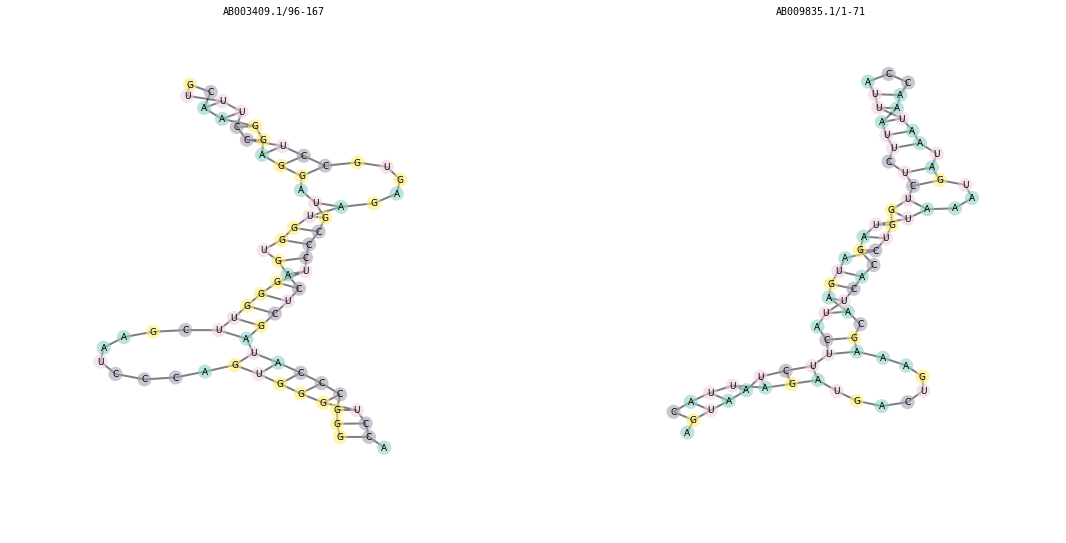

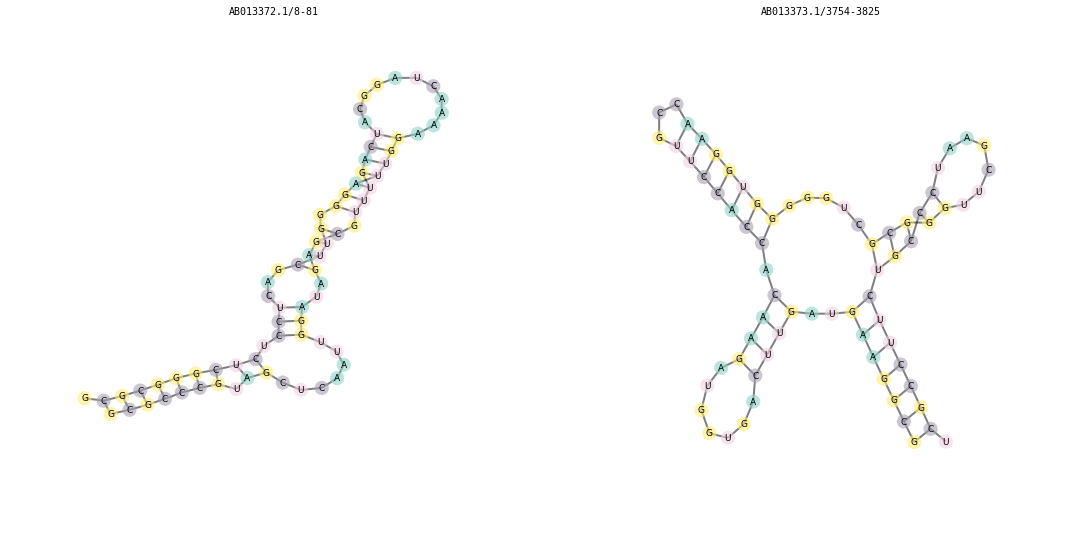

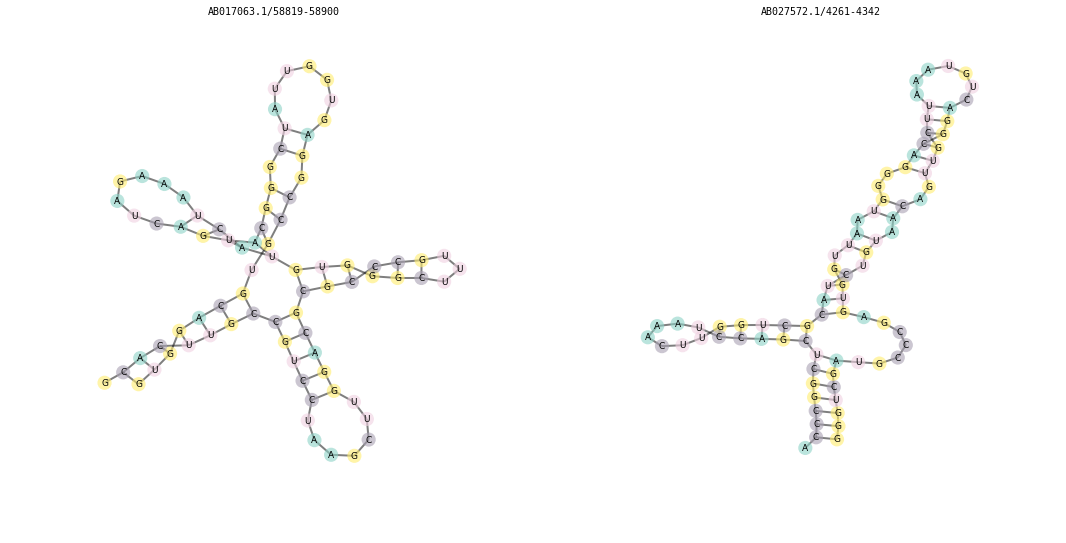

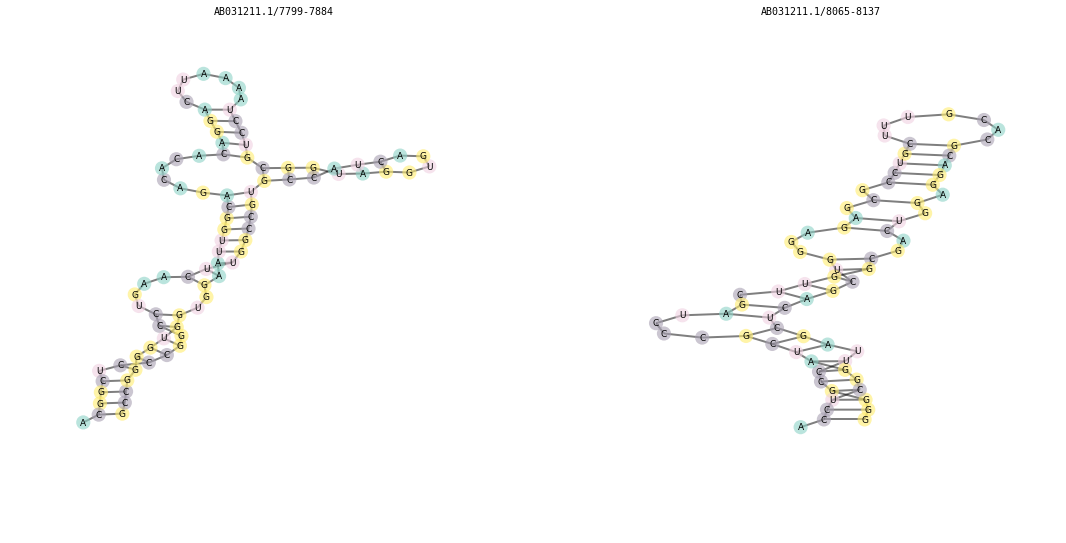

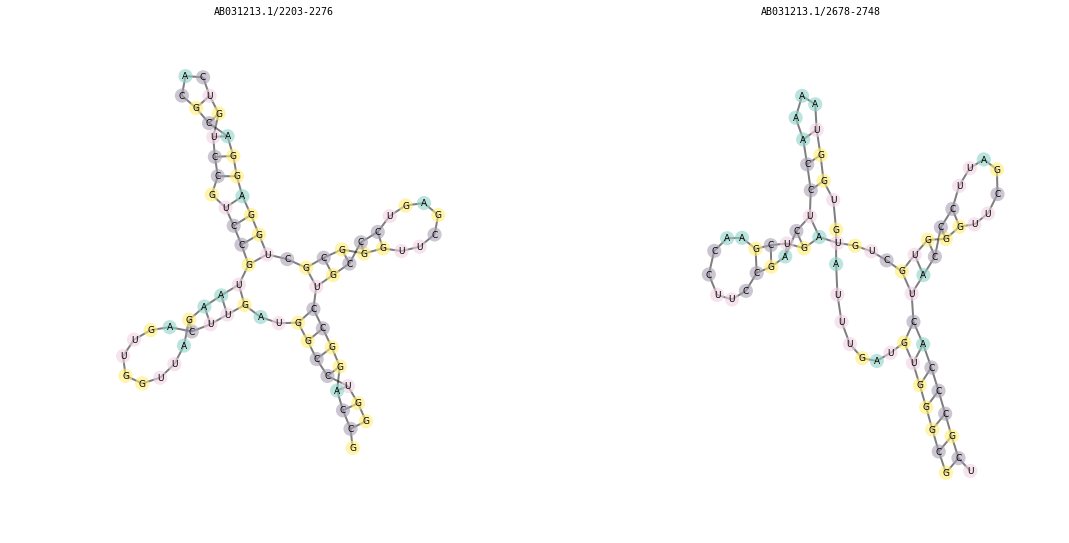

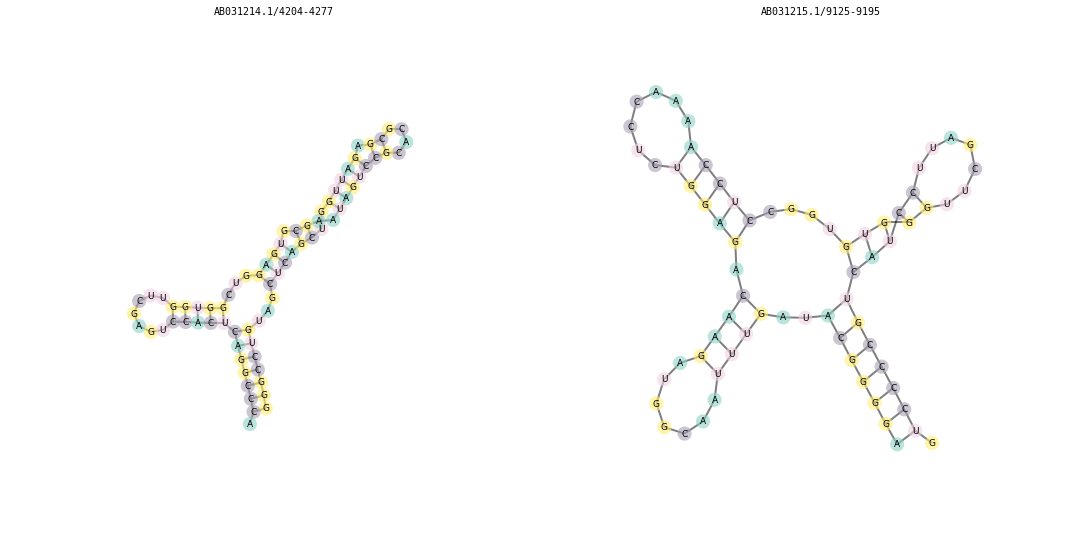

In [7]:
draw_structs('RF00005', 12)

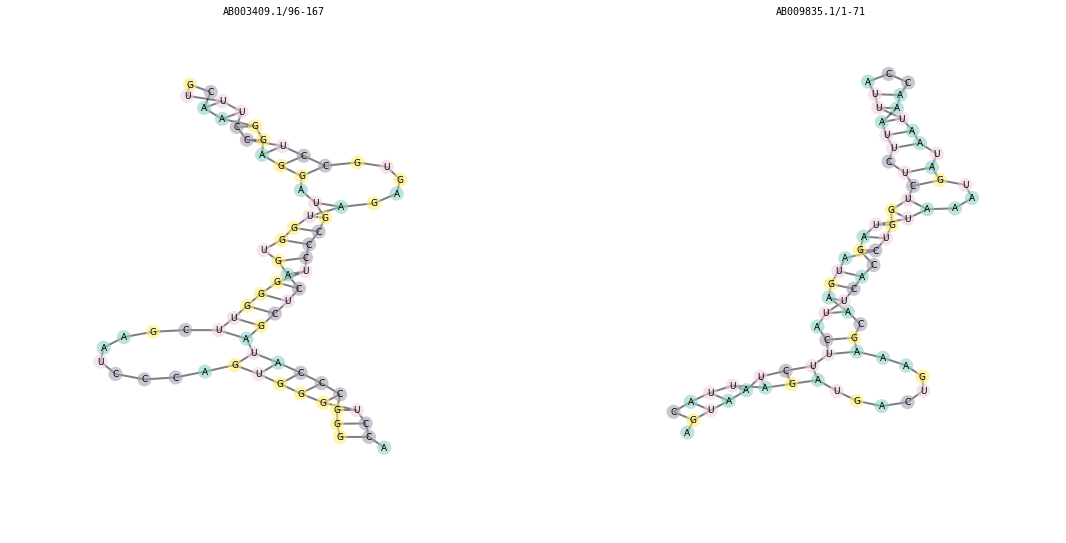

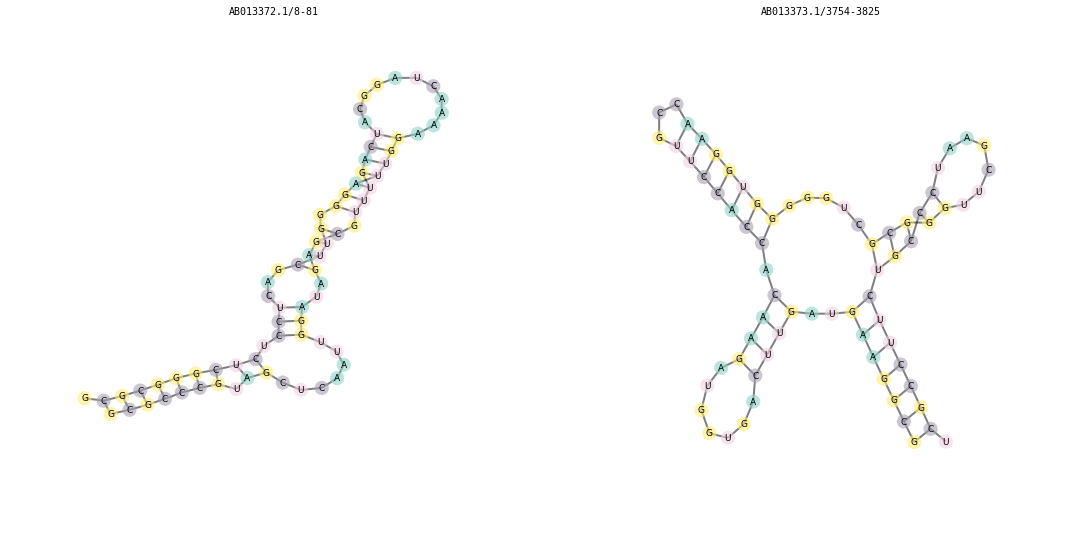

In [5]:
from eden_rna.rnafold import fold
draw_structs = compose(draw_graph_set_rna, fold, load_rfam)
draw_structs('RF00005', 4)

---